In [15]:
import re
import nltk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
from sklearn.decomposition import PCA
import gensim.downloader as api

# ========== Step 1: Preprocess Text ==========


In [16]:
# Download stopwords if not already
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load and clean text
with open("/content/drive/MyDrive/Colab Notebooks/data_visualizition/data_asset/11-0.txt", "r", encoding="utf-8") as file:
    text = file.read()

# Remove Gutenberg headers/footers
text = re.split(r"\*\*\* START OF.*?\*\*\*", text, maxsplit=1)[-1]
text = re.split(r"\*\*\* END OF.*?\*\*\*", text, maxsplit=1)[0]

# Remove punctuation, lowercase, split, and remove stopwords
clean_text = re.sub(r"[^a-zA-Z\s]", "", text).lower()
words = clean_text.split()
filtered_words = [word for word in words if word not in stop_words]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# ========== Step 2: Word Frequency Visualization ==========

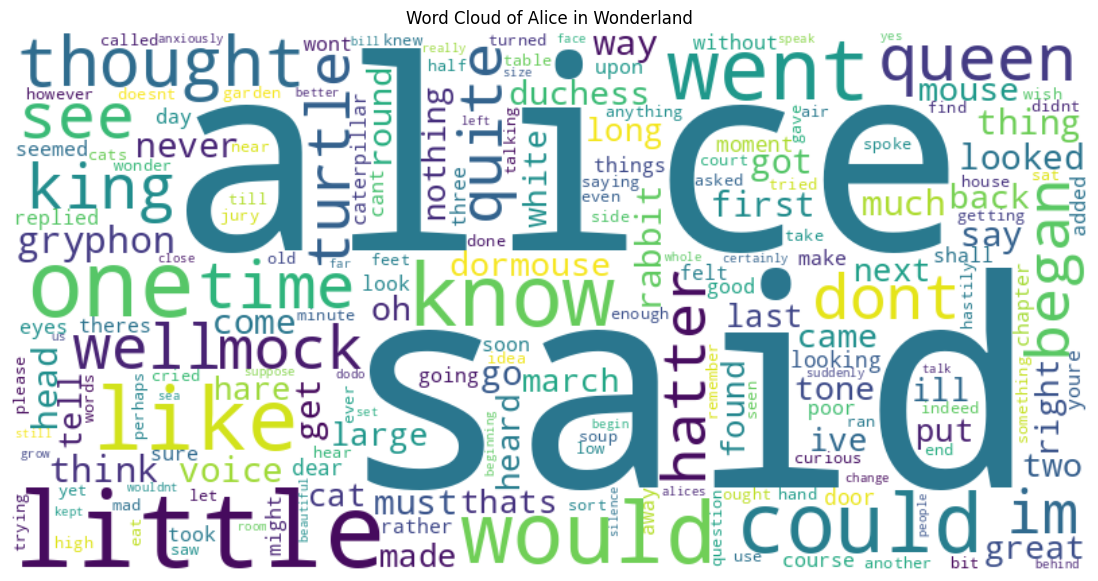

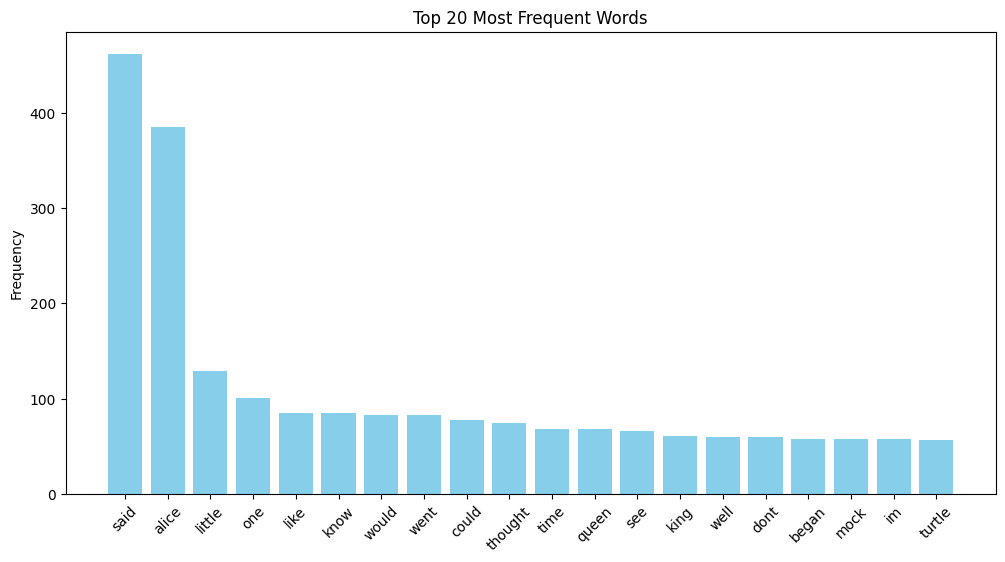

In [17]:
# Count word frequencies
word_counts = Counter(filtered_words)

# Word Cloud
wc = WordCloud(width=800, height=400, background_color='white')
wc.generate_from_frequencies(word_counts)

plt.figure(figsize=(15, 7))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Alice in Wonderland")
plt.show()

# Bar Chart - Top 20 Words
top_20 = word_counts.most_common(20)
labels, values = zip(*top_20)

plt.figure(figsize=(12, 6))
plt.bar(labels, values, color='skyblue')
plt.xticks(rotation=45)
plt.title("Top 20 Most Frequent Words")
plt.ylabel("Frequency")
plt.show()

# ========== Step 3: Semantic Relationships with GloVe + PCA ==========

Loading GloVe...


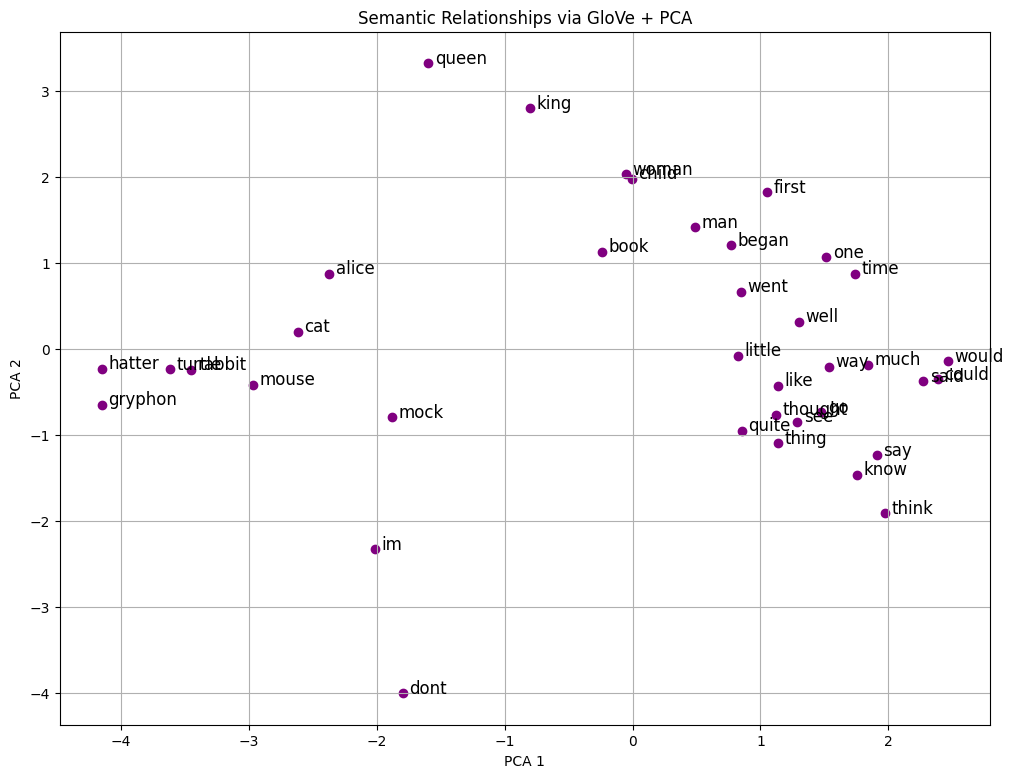

In [18]:
# Load GloVe embeddings (100-dimensional)
print("Loading GloVe...")
glove = api.load("glove-wiki-gigaword-100")

# Top words from the text
top_words = [word for word, _ in word_counts.most_common(30)]

# Add custom words of interest
custom_words = ['king', 'queen', 'man', 'woman', 'cat', 'mouse', 'alice', 'rabbit', 'child', 'book']

# Combine and filter valid words in GloVe
all_words = list(set(top_words + custom_words))
valid_words = [word for word in all_words if word in glove]

# Get vectors
vectors = np.array([glove[word] for word in valid_words])

# PCA reduction
pca = PCA(n_components=2)
reduced = pca.fit_transform(vectors)

# Scatter plot
plt.figure(figsize=(12, 9))
plt.scatter(reduced[:, 0], reduced[:, 1], color='purple')

for i, word in enumerate(valid_words):
    plt.text(reduced[i, 0] + 0.05, reduced[i, 1], word, fontsize=12)

plt.title("Semantic Relationships via GloVe + PCA")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

# ========== Step 4: Word Similarity Heatmap ==========

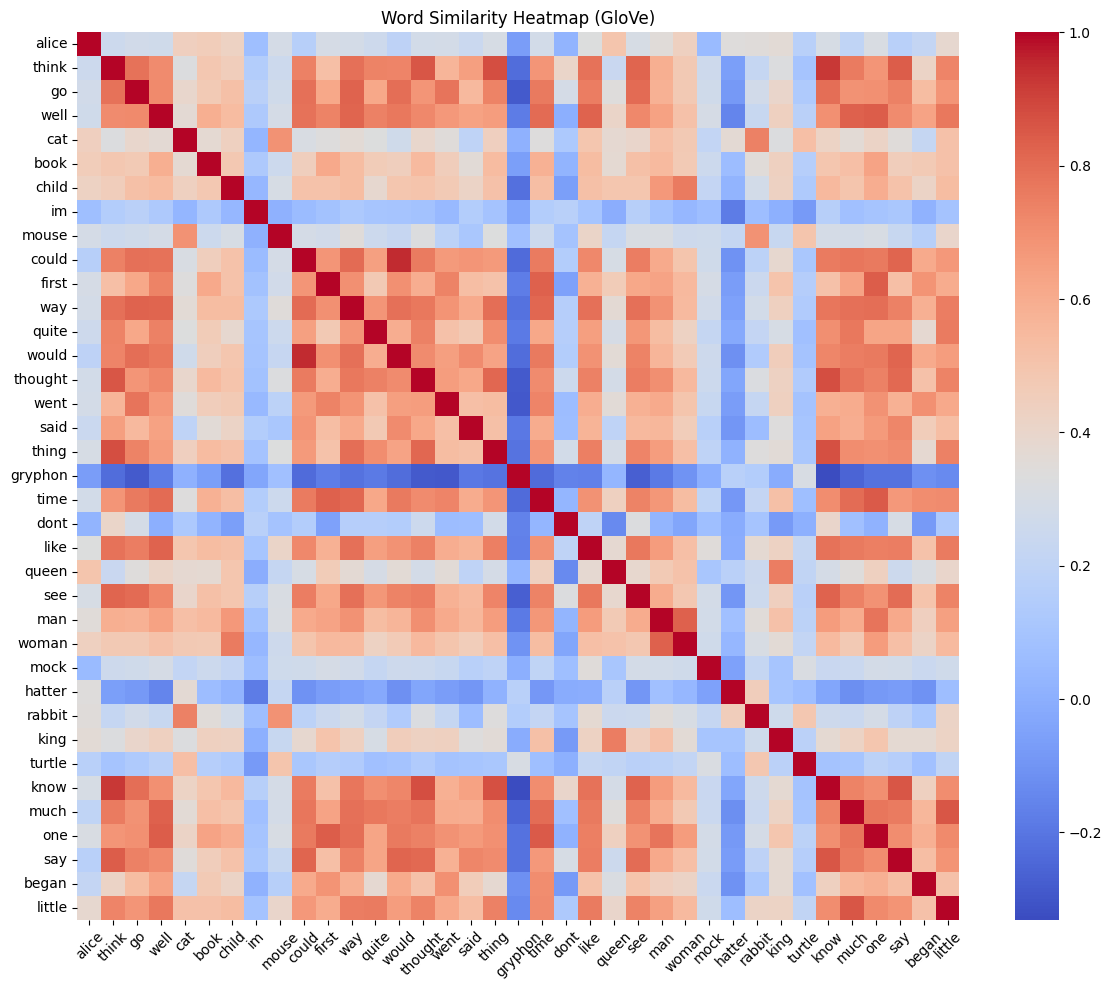

In [20]:
# Compute similarity matrix
similarity_matrix = np.array([
    [glove.similarity(w1, w2) for w2 in valid_words]
    for w1 in valid_words
])

# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(similarity_matrix, xticklabels=valid_words, yticklabels=valid_words, cmap="coolwarm")
plt.title("Word Similarity Heatmap (GloVe)")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()